# Deep Learning 2021-22 / Summer Semester 
## Week 2: (Multiple) Linear Regression

To start off, we will introduce the problem of regression.
This is the task of predicting a *real valued target* $y$
given a data point $\mathbf{x}$.
Regression problems are common in practice, arising
whenever we want to predict a continuous numerical value.
Some examples of regression problems include
predicting house prices, stock prices,
length of stay (for patients in the hospital),
tomorrow's temperature, demand forecasting (for retail sales), and many more.
Note that not every prediction problem is a regression problem.
In subsequent sections we will discuss classification problems,
where our predictions are discrete categories.

## Basic Elements of Linear Regression

Linear regression, which dates to Gauss and Legendre,
is perhaps the simplest, and by far the most popular approach
to solving regression problems.
What makes linear regression *linear* is that
we assume that the output truly can be expressed
as a *linear* combination of the input features.


### Linear Model

To keep things simple, we will start with running example
in which we consider the problem
of estimating the price of a house (e.g. in dollars)
based on area (e.g. in square feet) and age (e.g. in years).
More formally, the assumption of linearity suggests
that our model can be expressed in the following form:

$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b$$


Given a collection of data points $X$ and a vector
containing the corresponding target values $\mathbf{y}$,
the goal of linear regression is to find
the *weight* vector $w$ and bias term $b$
(also called an *offset* or *intercept*)
that associates each data point $\mathbf{x}_i$
with an approximation $\hat{y}_i$ of its corresponding label $y_i$.

Expressed in terms of a single data point,
this gives us the expression (same as above)
$\hat{y} = \mathbf{w}^\top \mathbf{x} + b$.

Finally, for a collection of data points $\mathbf{X}$,
the predictions $\hat{\mathbf{y}}$ can be expressed via the matrix-vector product:

$${\hat{\mathbf{y}}} = X \mathbf{w} + b$$


### Training Data

The first thing that we need is training data.
Sticking with our running example, we'll need some collection of examples
for which we know both the actual selling price of each house
as well as their corresponding area and age.
Our goal is to identify model parameters
that minimize the error between the predicted price and the real price.
In the terminology of machine learning, the data set is called a ‘training data’ or ‘training set’, a house (often a house and its price) here comprises one ‘sample’, and its actual selling price is called a ‘label’.
The two factors used to predict the label
are called ‘features’ or 'covariates'.

Typically, we will use $n$ to denote the number of samples in our dataset.
We index the samples by $i$, denoting each input data point as $x^{(i)} = [x_1^{(i)}, x_2^{(i)}]$ and the corresponding label as $y^{(i)}$.

### Loss Function

In model training, we need to measure the error
between the predicted value and the real value of the price.
Usually, we will choose a non-negative number as the error.
The smaller the value, the smaller the error.
A common choice is the square function.
For given parameters $\mathbf{w}$ and $b$,
we can express the error of our prediction on a given a sample as follows:

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2,$$

The constant $1/2$ is just for mathematical convenience,
ensuring that after we take the derivative of the loss,
the constant coefficient will be $1$.
The smaller the error, the closer the predicted price is to the actual price, and when the two are equal, the error will be zero.

Since the training dataset is given to us, and thus out of our control,
the error is only a function of the model parameters.
In machine learning, we call the function that measures the error the ‘loss function’.
The squared error function used here is commonly referred to as ‘square loss’.

To make things a bit more concrete, consider the example below where we plot a regression problem for a one-dimensional case, e.g. for a model where house prices depend only on area.

![alt text](https://drive.google.com/uc?id=1ago9T6RAYLHwLZ-u6w41qba95RlLP-_z)


Linear regression is a single-layer neural network. 

As you can see, large differences between estimates $\hat{y}^{(i)}$ and observations $y^{(i)}$ lead to even larger contributions in terms of the loss, due to the quadratic dependence. To measure the quality of a model on the entire dataset, we can simply average the losses on the training set.

$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

When training the model, we want to find parameters ($\mathbf{w}^*, b^*$) that minimize the average loss across all training samples:

$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$



### Gradient descent

Even in cases where we cannot solve the models analytically,
and even when the loss surfaces are high-dimensional and nonconvex,
it turns out that we can still make progress.
Moreover, when those difficult-to-optimize models are sufficiently superior for the task at hand, figuring out how to train them is well worth the trouble.

The key trick behind nearly all of deep learning
and that we will repeatedly throughout this book
is to reduce the error gradually by iteratively updating the parameters,
each step moving the parameters in the direction
that incrementally lowers the loss function.
This algorithm is called gradient descent.
On convex loss surfaces it will eventually converge to a global minimum,
and while the same can't be said for nonconvex surfaces,
it will at least lead towards a (hopefully good) local minimum.

The most naive application of gradient descent consists of taking the derivative of the true loss, which is an average of the losses computed on every single example in the dataset. In practice, this can be extremely slow. We must pass over the entire dataset before making a single update.
Thus, we'll often settle for sampling a random mini-batch
of examples every time we need to computer the update,
a variant called *stochastic gradient descent*.

In each iteration, we first randomly and uniformly sample a mini-batch $\mathcal{B}$ consisting of a fixed number of training data examples.
We then compute the derivative (gradient) of the average loss on the mini batch with regard to the model parameters.
Finally, the product of this result and a predetermined step size $\eta > 0$ are used to update the parameters in the direction that lowers the loss.

We can express the update mathematically as follows ($\partial$ denotes the partial derivative):

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)$$


To summarize, steps of the algorithm are the following:
(i) we initialize the values of the model parameters, typically at random;
(ii) we iterate over the data many times,
updating the parameters in each by moving the parameters in the direction of the negative gradient, as calculated on a random minibatch of data.

### Model Prediction

After completing the training process, we record the estimated model parameters, denoted $\hat{\mathbf{w}}, \hat{b}$
(in general the "hat" symbol denotes estimates).
Note that the parameters that we learn via gradient descent
are not exactly equal to the true minimizers of the loss on the training set,
that's because gradient descent converges slowly to a local minimum but does not achieve it exactly.
Moreover if the problem has multiple local minimum, we may not necessarily achieve the lowest minimum.
Fortunately, for deep neural networks, finding parameters that minimize the loss *on training data* is seldom a significant problem. The more formidable task is to find parameters that will achieve low loss on data that we have not seen before, a challenge called *generalization*. We return to these topics throughout the book.

Given the learned linear regression model $\hat{\mathbf{w}}^\top x + \hat{b}$, we can now estimate the price of any house outside the training data set with area (square feet) as $x_1$ and house age (year) as $x_2$. Here, estimation also referred to as ‘model prediction’ or ‘model inference’.

Note that calling this step 'inference' is a misnomer,
but has become standard jargon in deep learning.
In statistics, 'inference' means estimating parameters
and outcomes based on other data.
This misuse of terminology in deep learning
can be a source of confusion when talking to statisticians.


## From Linear Regression to Deep Networks

So far we only talked about linear functions. While neural networks cover a much richer family of models, we can begin thinking of the linear model as a neural network by expressing it the language of neural networks. To begin, let's start by rewriting things in a 'layer' notation.

### Neural Network Diagram

Commonly, deep learning practitioners represent models visually using neural network diagrams. In Figure 3.1, we represent linear regression with a neural network diagram. The diagram shows the connectivity among the inputs and output, but does not depict the weights or biases (which are given implicitly).

![alt text](https://drive.google.com/uc?id=1-8TFMQ8pA1p4fpRTILCFXv_3X5a5RkST)


Linear regression is a single-layer neural network.

In the above network, the inputs are $x_1, x_2, \ldots x_d$.
Sometimes the number of inputs are referred to as the feature dimension.
For linear regression models, we act upon $d$ inputs and output $1$ value.
Because there is just a single computed neuron (node) in the graph,
we can think of linear models as neural networks consisting of just a single neuron. Since all inputs are connected to all outputs (in this case it's just one), this layer can also be regarded as an instance of a *fully-connected layer*, also commonly called a *dense layer*.


# Linear Regression Implementation from Scratch


Now that you have some background on the *ideas* behind linear regression,
we are ready to step through a hands-on implementation.
In this section, and similar ones that follow,
we are going to implement all parts of linear regression:
the data pipeline, the model, the loss function,
and the gradient descent optimizer, from scratch.
Not surprisingly, today's deep learning frameworks
can automate nearly all of this work,
but if you never learn to implement things from scratch,
then you may never truly understand how the model works.
Moreover, when it comes time to customize models,
defining our own layers, loss functions, etc.,
knowing how things work under the hood will come in handy.
Thus, we start off describing how to implement linear regression
relying only on the primitives in the `torch.Tensor` and `autograd` packages.
In the section immediately following, we will present the compact implementation, using all of torch's bells and whistles,
but this is where we dive into the details.

To start off, we import the packages required to run this section's experiments: we'll be using `matplotlib` for plotting, setting it to embed in the GUI.

In [ ]:
%matplotlib inline
from IPython import display
from matplotlib import pyplot as plt
import torch
import random

## Generating Data Sets

For this demonstration, we will construct a simple artificial dataset
so that we can easily visualize the data
and compare the true pattern to the learned parameters.
We will set the number of examples in our training set to be 1000
and the number of features (or covariates) to 2.
Thus our synthetic dataset will be an object
$\mathbf{X}\in \mathbb{R}^{1000 \times 2}$.
In this example, we will synthesize our data by sampling
each data point $\mathbf{x}_i$ from a Gaussian distribution.

Moreover, to make sure that our algorithm works,
we will assume that the linearity assumption holds
with true underlying parameters $\mathbf{w} = [2, -3.4]^\top$ and $b = 4.2$.
Thus our synthetic labels will be given according to the
following linear model which includes a noise term $\epsilon$ to account for
measurement errors on the features and labels:

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b$$

In [ ]:
num_inputs = 2
num_examples = 1000
true_w = torch.tensor([2, -3.4]) 
true_b = 4.2 
features = torch.zeros(size=(num_examples, num_inputs)).normal_() # replace zero entries with values with normal standard distr 
labels = torch.matmul(features, true_w) + true_b 
#labels += torch.zeros(size=labels.shape).normal_(std=0.01) # here we add a small bias values to each instance 

Note that each row in `features` consists of a 2-dimensional data point and that each row in `labels` consists of a 1-dimensional target value (a scalar).

In [ ]:
features[0], labels[0]

(tensor([1.2601, 2.2075]), tensor(-0.7853))

By generating a scatter plot using the second `features[:, 1]` and `labels`, we can clearly observe the linear correlation between the two.

C:\Users\tahir\AppData\Local\Temp\ipykernel_29320\3131169397.py:3: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


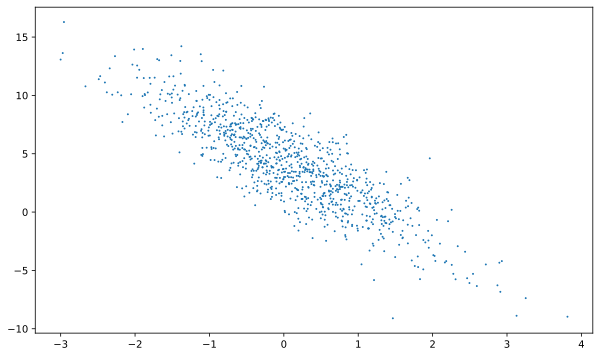

In [ ]:
def use_svg_display():
    # Display in vector graphics
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # Set the size of the graph to be plotted
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.figure(figsize=(10, 6))
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1); # here we have to convert back to numpy bc plt works on top of it. 

## Reading Data

Recall that training models, consists of making multiple passes over the dataset, grabbing one mini-batch of examples at a time and using them to update our model. Since this process is so fundamental to training machine learning algortihms, we need a utility for shuffling the data and accessing in mini-batches.

In the following code, we define a `data_iter` function to demonstrate one possible implementation of this functionality.
The function takes a batch size, a design matrix containing the features,
and a vector of labels, yielding minibatches of size `batch_size`,
each consisting of a tuple of features and labels.

In [ ]:
# here we generate all the batches 
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    # The examples are read at random, in no particular order
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[j], labels[j]  # https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do


In general, note that we want to use reasonably sized minibatches to take advantage of the GPU hardware, which excels at parallelizing operations. Because each example can be fed through our models in parallel and the gradient of the loss function for each example can also be taken in parallel, GPUs allow us to process hundreds of examples in scarcely more time than it might take to process just a single example.

To build some intuition, let's read and print the first small batch of data examples. The shape of the features in each mini-batch tells us both the mini-batch size and the number of input features. Likewise, our mini-batch of labels will have a shape given by `batch_size`.

In [ ]:
batch_size = 10

# here we look at a randomly generated batch (breaking after 1 iteration)
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n\n', y, '\n\n')
    #break

tensor([[ 0.7231,  0.6902],
        [ 0.0452,  1.2135],
        [-1.0760, -0.4349],
        [ 0.7185, -0.2218],
        [ 0.8076,  0.6024],
        [ 0.2245, -1.0755],
        [ 0.2452, -0.6945],
        [ 0.5389,  1.1817],
        [-0.8097,  0.1521],
        [-0.8941, -0.2391]]) 

 tensor([3.2993, 0.1645, 3.5265, 6.3912, 3.7669, 8.3055, 7.0518, 1.2598, 2.0635,
        3.2248]) 


tensor([[-1.0820, -1.3678],
        [-0.9478,  1.3427],
        [ 0.3643, -0.9159],
        [-1.4198,  1.1954],
        [-0.1662,  1.9022],
        [-0.3546,  0.5438],
        [-2.1641,  0.2166],
        [ 0.6942, -1.9432],
        [-0.4862, -0.4490],
        [-1.3422, -0.0319]]) 

 tensor([ 6.6864, -2.2609,  8.0427, -2.7042, -2.5999,  1.6417, -0.8648, 12.1952,
         4.7540,  1.6242]) 


tensor([[-0.7860, -0.1932],
        [ 0.5813,  0.2334],
        [-0.0028,  0.7285],
        [-1.4099, -0.0651],
        [-1.4869,  0.2724],
        [ 0.7436,  1.2780],
        [-1.8403, -0.1751],
        [-2.5588,  0.3865]

In [ ]:
data_iter(batch_size, features, labels)

<generator object data_iter at 0x000001BD2D55CA50>

It should be no surprise that as we run the iterator,
we will obtain distinct minibatches each time
until all the data has been exhausted (try this).
While the iterator implemented above is good for didactic purposes,
it is inefficient in ways that might get us in trouble on real problems.
For example, it requires that we load all data in memory
and that we perform a lot of random memory access.
The built-in iterators implemented in torch
are considerably efficient and they can deal
both with data stored on file and data fed via a data stream.

## Initialize Model Parameters

Before we can begin optimizing our model's parameters by gradient descent,
we need to have some parameters in the first place.
In the following code, we initialize weights by sampling
random numbers from a normal distribution with mean 0
and a standard deviation of 0.01, setting the bias $b$ to 0.

In [ ]:
w = torch.zeros(size=(num_inputs, 1)).normal_(std=0.01)
print(w)
b = torch.zeros(size=(1,))
print(b)

tensor([[-0.0014],
        [ 0.0009]])
tensor([0.])


Now that we have initialized our parameters,
our next task is to update them until they fit our data sufficiently well.
Each update will require taking the gradient
(a multi-dimensional derivative)
of our loss function with respect to the parameters.
Given this gradient, we will update each parameter
in the direction that reduces the loss.

Since nobody wants to compute gradients explicitly
(this is tedious and error prone),
we use automatic differentiation to compute the gradient.
See :numref:`chapter_autograd`
for more details.
Recall from the autograd chapter
that in order for `autograd` to know
that it should store a gradient for our parameters,
we need to invoke the `attach_grad` function,
allocating memory to store the gradients that we plan to take.

In [ ]:
w.requires_grad_(True)
b.requires_grad_(True)

tensor([0.], requires_grad=True)

## Define the Model

Next, we must define our model,
relating its inputs and parameters to its outputs.
Recall that to calculate the output of the linear model,
we simply take the matrix-vector dot product
of the examples $\mathbf{X}$ and the models weights $w$,
and add the offset $b$ to each example.
Note that below `torch.matmul(X, w)` is a vector and `b` is a scalar.
Recall that when we add a vector and a scalar,
the scalar is added to each component of the vector.

In [ ]:
# This function has been saved in the d2l package for future use
def linreg(X, w, b):
    return torch.matmul(X, w) + b

## Define the Loss Function

Since updating our model requires taking the gradient of our loss function,
we ought to define the loss function first.
Here we will use the squared loss function
as described in the previous section.
In the implementation, we need to transform the true value `y` into the predicted value's shape `y_hat`.
The result returned by the following function
will also be the same as the `y_hat` shape.

In [ ]:
# This function has been saved in the d2l package for future use
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

## Define the Optimization Algorithm

As we discussed in the previous section,
linear regression has a closed-form solution.
However, this course isn't about linear regression,
it's about deep learning.Now we introduce your first working example of stochastic gradient descent (SGD).


At each step, using one batch randomly drawn from our dataset,
we'll estimate the gradient of the loss with respect to our parameters.
Then, we'll update our parameters a small amount
in the direction that reduces the loss.
Assuming that the gradient has already been calculated,
each parameter (`param`) already has its gradient stored in `param.grad`.
The following code applies the SGD update,
given a set of parameters, a learning rate, and a batch size.
The size of the update step is determined by the learning rate `lr`.
Because our loss is calculated as a sum over the batch of examples,
we normalize our step size by the batch size (`batch_size`),
so that the magnitude of a typical step size
doesn't depend heavily on our choice of the batch size.

In [ ]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data.sub_(lr*param.grad/batch_size)
        param.grad.data.zero_()

## Training

Now that we have all of the parts in place,
we are ready to implement the main training loop.
It is crucial that you understand this code
because you will see training loops that are nearly identical to this one
over and over again throughout your career in deep learning.

In each iteration, we will grab minibatches of models,
first passing them through our model to obtain a set of predictions.
After calculating the loss, we will call the `backward` function
to backpropagate through the network, storing the gradients
with respect to each parameter in its corresponding `.grad` attribute.
Finally, we will call the optimization algorithm `sgd`
to update the model parameters.
Since we previously set the batch size `batch_size` to 10,
the loss shape `l` for each small batch is (10, 1).

In summary, we'll execute the following loop:

* Initialize parameters $(\mathbf{w}, b)$
* Repeat until done
    * Compute gradient $\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{\mathcal{B}} \sum_{i \in \mathcal{B}} l(\mathbf{x}^i, y^i, \mathbf{w}, b)$
    * Update parameters $(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

In the code below, `l` is a vector of the losses
for each example in the minibatch.
Because `l` is not a scalar variable,
running `l.backward()` adds together the elements in `l`
to obtain the new variable and then calculates the gradient.

In each epoch (a pass through the data),
we will iterate through the entire dataset
(using the `data_iter` function) once
passing through every examples in the training dataset
(assuming the number of examples is divisible by the batch size).
The number of epochs `num_epochs` and the learning rate `lr` are both hyper-parameters, which we set here to $3$ and $0.03$, respectively. In general, setting hyper-parameters is tricky
and requires some adjustment by trial and error.
We elide these details for now but revise them
later in
:numref:`chapter_optimization`.

In [ ]:
lr = 0.03  # Learning rate
num_epochs = 7  # Number of iterations
net = linreg  # Our fancy linear model
loss = squared_loss  # 0.5 (y-y')^2

for epoch in range(num_epochs):
    # Assuming the number of examples can be divided by the batch size, all
    # the examples in the training data set are used once in one epoch
    # iteration. The features and tags of mini-batch examples are given by X
    # and y respectively
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)  # Minibatch loss in X and y
        l.mean().backward()  # Compute gradient on l with respect to [w,b]
        sgd([w, b], lr, batch_size)  # Update parameters using their gradient
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print('epoch %d, loss %f' % (epoch + 1, train_l.mean().numpy()))

epoch 1, loss 8.878075
epoch 2, loss 5.036197
epoch 3, loss 2.858325
epoch 4, loss 1.623023
epoch 5, loss 0.922034
epoch 6, loss 0.523998
epoch 7, loss 0.297903


In this case, because we used synthetic data, we know precisely what the true parameters are. Thus, we can evaluate our success in training by comparing the true parameters with those that we learned through our training loop. Indeed they turn out to be very close to each other.

In [ ]:
print('Error in estimating w', true_w - w.reshape(true_w.shape))
print('Error in estimating b', true_b - b)

Error in estimating w tensor([ 0.2488, -0.5138], grad_fn=<SubBackward0>)
Error in estimating b tensor([0.5561], grad_fn=<RsubBackward1>)


Note that we should not take it for granted
that we are able to recover the parameters accurately.
This only happens for a special category problems:
strongly convex optimization problems with 'enough' data to ensure
that the noisy samples allow us to recover the underlying dependency.
In most cases this is *not* the case.
In fact, the parameters of a deep network are rarely the same (or even close) between two different runs, unless all conditions are identical,
including the order in which the data is traversed.
However, in machine learning we are typically less concerned
with recovering true underlying parameters,
and more concerned with parameters that lead to accurate prediction.
Fortunately, even on difficult optimization problems,
that stochastic gradient descent can often lead to remarkably good solutions,
due in part to the fact that for the models we will be working with,
there exist many sets of parameters that work well.

## Summary

We saw how a deep network can be implemented
and optimized from scratch, using just `torch.Tensor` and `autograd`,
without any need for defining layers, fancy optimizers, etc.
This only scratches the surface of what is possible.
In the following sections, we will describe additional models
based on the concepts that we have just introduced
and learn how to implement them more concisely.


# Concise Implementation of Linear Regression

The surge of deep learning has inspired the development of a variety of mature software frameworks, that
automate much of the repetitive work of implementing deep learning models. In the previous section we
relied only on NDarray for data storage and linear algebra and the auto-differentiation capabilities in the
autograd package. In practice, because many of the more abstract operations, e.g. data iterators, loss
functions, model architectures, and optimizers, are so common, deep learning libraries will give us library
functions for these as well.

We have used DataLoader to load the MNIST dataset in Section 4.5. In this section, we will learn how we can
implement the linear regression model in Section 5.2 much more concisely with DataLoader.

##  Generating Data Sets

To start, we will generate the same data set as that used in the previous section.

In [ ]:
import torch
import numpy as np
def synthetic_data(w, b, num_examples):
    """generate y = X w + b + noise"""
    X = np.random.normal(scale=1, size=(num_examples, len(w)))
    y = np.dot(X, w) + b
    y += np.random.normal(scale=0.01, size=y.shape)
    X=torch.from_numpy(X).float()
    y=torch.from_numpy( y).float().reshape(-1,1)
    return X,y
true_w = torch.Tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

##  Reading Data

Rather than rolling our own iterator, we can call upon DataLoader module to read data. The first step will be to instantiate an ArrayDataset, which takes in one or more NDArrays as arguments. Here, we pass in features and
labels as arguments. Next, we will use the ArrayDataset to instantiate a DataLoader, which also requires
that we specify a batch_size and specify a Boolean value shuffle indicating whether or not we want the
DataLoader to shuffle the data on each epoch (pass through the dataset).

In [ ]:
from torch.utils.data import TensorDataset,DataLoader

def load_array(data_arrays, batch_size, is_train=True):
    dataset=TensorDataset(*(features,labels))
    dataloader = DataLoader(dataset=dataset,batch_size=batch_size,shuffle=True)
    return dataloader

batch_size =10
data_iter = load_array((features, labels), batch_size)

Now we can use data_iter in much the same way as we called the data_iter function in the previous
section. To verify that it’s working, we can read and print the first mini-batch of instances.

In [ ]:
for X, y in data_iter:
    print(X)
    print(y)
    break

tensor([[-0.4764, -0.3607],
        [-2.3799,  0.5307],
        [ 0.6671,  1.3837],
        [-0.5847,  0.7339],
        [-0.4386, -1.5591],
        [ 0.8579,  0.0034],
        [ 1.2671, -2.1135],
        [ 0.0876, -0.1528],
        [ 0.7000, -1.6274],
        [-1.0438, -1.4772]])
tensor([[ 4.4751],
        [-2.3631],
        [ 0.8345],
        [ 0.5204],
        [ 8.6371],
        [ 5.8877],
        [13.9164],
        [ 4.8857],
        [11.1309],
        [ 7.1513]])


##  Define the Model

When we implemented linear regression from scratch in the previous section, we had to define the model
parameters and explicitly write out the calculation to produce output using basic linear algebra operations.
You should know how to do this. But once your models get more complex, even qualitatively simple changes
to the model might result in many low-level changes.

We import torch.nn as nn .For standard operations, we can use nn's predefined layers, which allow us to focus especially on thelayers used to construct the model rather than having to focus on the implementation.
To define a linear model, we first import the nn module, which defines a large number of neural network
layers (note that “nn” is an abbreviation for neural networks). We will first define a model variable net,
which is a Sequential instance. In nn, a Sequential instance can be regarded as a container that
concatenates the various layers in sequence. When input data is given, each layer in the container will be
calculated in order, and the output of one layer will be the input of the next layer. In this example, since
our model consists of only one layer, we do not really need Sequential. But since nearly all of our future
models will involve multiple layers, let’s get into the habit early.
Recall the architecture of a single layer network. The layer is fully connected since it connects all inputs
with all outputs by means of a matrix-vector multiplication. In nn, the fully-connected layer is defined
in the Linear class. Since we only want to generate a single scalar output,we set that number to 1.

![alt text](https://drive.google.com/uc?id=1-8TFMQ8pA1p4fpRTILCFXv_3X5a5RkST)

In [ ]:
class LinearRegressionModel(torch.nn.Module): 
    def __init__(self): 
        super(LinearRegressionModel, self).__init__() 
        self.layer1 = torch.nn.Linear(2, 1, bias=True)
        
    def forward(self, x): 
        y_pred = self.layer1(x)
        return y_pred 
    
net = LinearRegressionModel()

##  Initialize Model Parameters

Before using net, we need to initialize the model parameters, such as the weights and biases in the linear
regression model. we specify that each weight parameter should be randomly sampled from a normal distribution with mean 0 and standard deviation 0.01.
The bias parameter will be initialized to zero by default. Both weight and bias will be attached with
gradients.

In [ ]:
net.layer1.weight.data=torch.Tensor(np.random.normal(size=(1,2),scale=0.01,loc=0))
net.layer1.bias.data=torch.Tensor([0])

The code above looks straightforward but in reality something quite strange is happening here. We are
initializing parameters for a network even though we haven’t yet told nn how many dimensions the input
will have. It might be 2 as in our example or it might be 2,000, so we couldn’t just preallocate enough space
to make it work.
nn let’s us get away with this because behind the scenes, the initialization is deferred until the first time
that we attempt to pass data through our network. Just be careful to remember that since the parameters
have not been initialized yet we cannot yet manipulate them in any way.

##  Define the Loss Function

In nn, there are many loss modules that defines various loss functions and we will directly use its implementation of squared loss (MSELoss).

In [ ]:
loss = torch.nn.MSELoss(reduction = "sum") 

## Define the Optimization Algorithm

Not surpisingly, we aren’t the first people to implement mini-batch stochastic gradient descent, and thus
torch supports SGD alongside a number of variations on this algorithm through its Trainer class. When
we instantiate the Trainer, we’ll specify the parameters to optimize over (obtainable from our net via net.parameters()), the optimization algortihm we wish to use (sgd), and a dictionary of hyper-parameters
required by our optimization algorithm. SGD just requires that we set the value learning_rate, (here we
set it to 0.03).


In [ ]:
trainer = torch.optim.SGD(net.parameters(), lr = 0.03) 

##  Training

You might have noticed that expressing our model through torch requires comparatively few lines of code.
We didn’t have to individually allocate parameters, define our loss function, or implement stochastic gradient descent. Once we start working with much more complex models, the benefits of relying on torch
abstractions will grow considerably. But once we have all the basic pieces in place, the training loop itself strikingly similar to what we did when implementing everything from scratch.
To refresh your memory: for some number of epochs, we’ll make a complete pass over the dataset
(train_data), grabbing one mini-batch of inputs and corresponding ground-truth labels at a time. 

For
each batch, we’ll go through the following ritual:

• Generate predictions by calling net(X) and calculate the loss l (the forward pass).

• Calculate gradients by calling l.backward() (the backward pass).

• Update the model parameters by invoking our SGD optimizer (note that trainer already knows which parameters to optimize over, so we just need to pass in the batch size.

For good measure, we compute the loss after each epoch and print it to monitor progress.

In [ ]:
num_epochs = 3
for epoch in range(num_epochs): 
    for X,y in data_iter:
        l = loss(net(X), y)
        trainer.zero_grad() 
        l.backward() 
        trainer.step() 

    l_epoch = loss(net(features), labels) 
    print('epoch {}, loss {}'.format(epoch+1, l_epoch)) 

epoch 1, loss 0.11549094319343567
epoch 2, loss 0.1427571177482605
epoch 3, loss 0.10610517859458923


The model parameters we have learned and the actual model parameters are compared as below. We get
the layer we need from the net and access its weight (weight) and bias (bias). The parameters we have
learned and the actual parameters are very close.

In [ ]:
w = list(net.parameters())[0][0]
print('Error in estimating w', true_w.reshape(w.shape) - w)
b = list(net.parameters())[1][0]
print('Error in estimating b', true_b - b)

Error in estimating w tensor([-0.0010,  0.0016], grad_fn=<SubBackward0>)
Error in estimating b tensor(0.0005, grad_fn=<RsubBackward1>)
